# 9.5

In [1]:
import tweepy
from collections import Counter
from konlpy.tag import Twitter
from konlpy.tag import Kkma
import pytagcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
from matplotlib import font_manager, rc #한글 깨짐 현상

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다
from scipy.cluster.hierarchy import dendrogram, ward
from scipy.cluster import hierarchy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
api_key = "ylylXf2ehm9dz3b3m9oIzrE4q"
api_secret = "9YSr1xGBhaVj99XUcHkHZ47xnqi4n5tIMkhCIUQom32urHbQAH"

In [4]:
auth = tweepy.OAuthHandler(api_key, api_secret)

access_token = "1171579869047607296-JT7dgVK9ORIzkPA5Mx0uPy87AC1106"
access_token_secret = "RFT9IzxyBZrO2ghj1VE2AhP8NOLUGMjnVIm6Opim0UvWk"

In [5]:
auth.set_access_token(access_token, access_token_secret)

In [6]:
api = tweepy.API(auth)

In [7]:
keyword = "BarackObama";     # 자신이 검색하고 싶은 유저
search = [] # 크롤링 결과 저장할 변수   

In [8]:
cnt = 1
while(cnt <= 10):   # 10page 대상으로 크롤링
    tweets = api.user_timeline(keyword)
    for tweet in tweets:
        search.append(tweet)
    cnt += 1

In [9]:
print(len(search)) # 문서 길이 

200


In [10]:
#전체 문서 보기

data = {}   # 전체 문서 추가
i = 0       # 문서 번호
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    print(i, " : ", data)   # 문서번호 : 문서내용
    i += 1

0  :  {'text': 'The best part of my job was meeting people like this—ready to make a selfless act in a time of need. Many Americans… https://t.co/d6c56VtEjk'}
1  :  {'text': '.@rgay and @SheaSerrano are using their feeds to directly support people in need—and helping shift our ideas about… https://t.co/f5wO07YeTN'}
2  :  {'text': 'In my old neighborhood, the @BSAllianceChi established a crisis pantry to provide food and essential items for part… https://t.co/3S0XsrpkBb'}
3  :  {'text': '.@ObamaFoundation Fellow @alexsmith1982 is helping seniors fight loneliness in the UK through a mix of new and old… https://t.co/XN42EoXeQv'}
4  :  {'text': 'Some great stories of big-hearted people coming up with new ways to come together—even while remaining apart—to hel… https://t.co/6zeZriuo6P'}
5  :  {'text': 'In the meantime, remember to check up by phone on elderly or vulnerable friends and neighbors who may need our help.'}
6  :  {'text': 'As communities have begun to recognize the importance of

In [11]:
# 전체 문서를 파일 저장

import os
    
wfile = open(os.getcwd()+"/Obama.txt", mode='w', encoding="utf-8")   # 쓰기 모드
data = {}   # 전체 문서 추가
i = 0       # 문서 번호

In [12]:
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    wfile.write(data['text']+'\n')  # 파일 출력
    i += 1

wfile.close()

In [13]:
file = open(os.getcwd()+'/Obama.txt', mode='r', encoding='utf-8')

In [14]:
obama = file.readlines()

In [15]:
new = []
for d in obama:
    txt = re.sub("president", "", d)
    txt = re.sub("obama", "", txt)
    txt = re.sub("obamas", "", d)
    txt = re.sub("time", "", txt)
    txt = re.sub("watch", ' ', txt)
    txt = re.sub("today", "", txt)
    txt = re.sub("now", "", txt)
    txt = re.sub("just", "", txt)
    txt = re.sub("americans", "", txt)
    txt = re.sub("america", "", txt)
    txt = re.sub("\n", "", txt)
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub("https?://\S+", "", txt)
    new.append(txt)

In [16]:
new

['The best part of my job was meeting people like this ready to make a selfless act in a  of need  Many Americans  https   t co d c  VtEjk',
 '  rgay and  SheaSerrano are using their feeds to directly support people in need and helping shift our ideas about  https   t co f wO  YeTN',
 'In my old neighborhood  the  BSAllianceChi established a crisis pantry to provide food and essential items for part  https   t co  S XsrpkBb',
 '  ObamaFoundation Fellow  alexsmith     is helping seniors fight loneliness in the UK through a mix of new and old  https   t co XN  EoXeQv',
 'Some great stories of big hearted people coming up with new ways to come together even while remaining apart to hel  https   t co  zeZriuo P',
 'In the mean  remember to check up by phone on elderly or vulnerable friends and neighbors who may need our help ',
 'As communities have begun to recognize the importance of social distancing measures to  flatten the curve  on COVID  https   t co wWe N YpwP',
 'We owe a profound

In [17]:
vector = CountVectorizer()
print(vector.fit_transform(new).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'the': 220, 'best': 21, 'part': 156, 'of': 142, 'my': 132, 'job': 111, 'was': 238, 'meeting': 128, 'people': 158, 'like': 116, 'this': 224, 'ready': 175, 'to': 228, 'make': 123, 'selfless': 190, 'act': 1, 'in': 106, 'need': 133, 'many': 124, 'americans': 8, 'https': 100, 'co': 37, 'vtejk': 236, 'rgay': 181, 'and': 10, 'sheaserrano': 196, 'are': 13, 'using': 235, 'their': 221, 'feeds': 68, 'directly': 53, 'support': 215, 'helping': 94, 'shift': 197, 'our': 149, 'ideas': 101, 'about': 0, 'wo': 253, 'yetn': 260, 'old': 143, 'neighborhood': 135, 'bsalliancechi': 26, 'established': 63, 'crisis': 46, 'pantry': 154, 'provide': 172, 'food': 73, 'essential': 62, 'items': 109, 'for': 74, 'xsrpkbb': 258, 'obamafoundation': 141, 'fellow': 69, 'alexsmith': 5, 'is': 107, 'seniors': 192, 'fight': 70, 'loneliness': 119, 'uk': 232, 'through': 227, 'mix': 131, 'new': 137, 'xn': 257, '

In [18]:
tfidfv = TfidfVectorizer().fit(new)

In [19]:
matrix = pd.DataFrame(tfidfv.transform(new).toarray())

In [20]:
for i in range(len(list(tfidfv.vocabulary_.values()))):
    matrix.rename(columns = {list(tfidfv.vocabulary_.values())[i]:list(tfidfv.vocabulary_.keys())[i]}, inplace=True)

In [21]:
matrix

,about,act,affected,ago,airport,alexsmith,all,america,americans,an,...,xn,xsrpkbb,years,yetn,you,your,yourself,ypwp,zezriuo,zion
0,0.000000,0.255637,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.255637,0.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,0.251462,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,...,0.00000,0.000000,0.0,0.251462,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,...,0.00000,0.273109,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.26152,0.000000,0.000000,0.000000,0.0,...,0.26152,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.237095,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.476375,0.238188,0.0,0.000000,0.0
196,0.000000,0.000000,0.250293,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
197,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.167644,0.210954,0.000000,0.0,...,0.00000,0.000000,0.0,0.000000,0.185742,0.000000,0.000000,0.0,0.000000,0.0
198,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,...,0.00000,0.000000,0.0,0.000000,0.364757,0.000000,0.000000,0.0,0.000000,0.0


In [22]:
import numpy as np
matrix = np.array(matrix)

In [23]:
import numpy as np
from scipy.sparse import csr_matrix
MIN_VAL_ALLOWED = 12

In [24]:
X = csr_matrix(matrix)

In [25]:
z = np.squeeze(np.asarray(X.sum(axis=0) > MIN_VAL_ALLOWED)) #z is the non-sparse terms 

In [26]:
N = X[:,z].toarray()

In [27]:
print(N)

[[0.         0.07603774 0.07603774 0.20864791 0.08866466 0.08417954]
 [0.18390626 0.07479588 0.07479588 0.         0.         0.08280471]
 [0.09986891 0.08123467 0.08123467 0.         0.09472461 0.08993294]
 ...
 [0.         0.07519767 0.07519767 0.20634277 0.08768509 0.16649905]
 [0.09077284 0.07383582 0.07383582 0.         0.08609709 0.        ]
 [0.         0.         0.         0.10235099 0.08698784 0.        ]]


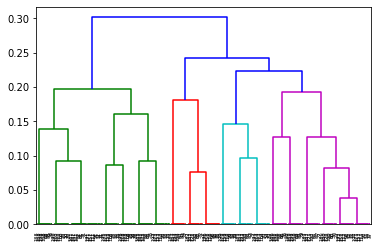

In [28]:
Z = hierarchy.linkage(N, 'complete')
D = dendrogram(Z)

# 9.6

In [97]:
from sklearn.cluster import KMeans

In [98]:
file = open(os.getcwd()+'/Obama.txt', mode='r', encoding='utf-8')

In [99]:
obama = file.readlines()
file.close()

In [100]:
new = []
for d in obama:
    txt = re.sub("president", "", txt)
    txt = re.sub("obama", "", txt)
    txt = re.sub("obamas", "", d)
    txt = re.sub("time", "", txt)
    txt = re.sub("watch", ' ', txt)
    txt = re.sub("today", "", txt)
    txt = re.sub("now", "", txt)
    txt = re.sub("just", "", txt)
    txt = re.sub("americans", "", txt)
    txt = re.sub("america", "", txt)
    txt = re.sub("\n", "", d)
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub("https?://\S+", "", txt)
    new.append(txt)

In [101]:
new

['The best part of my job was meeting people like this ready to make a selfless act in a time of need  Many Americans  https   t co d c  VtEjk',
 '  rgay and  SheaSerrano are using their feeds to directly support people in need and helping shift our ideas about  https   t co f wO  YeTN',
 'In my old neighborhood  the  BSAllianceChi established a crisis pantry to provide food and essential items for part  https   t co  S XsrpkBb',
 '  ObamaFoundation Fellow  alexsmith     is helping seniors fight loneliness in the UK through a mix of new and old  https   t co XN  EoXeQv',
 'Some great stories of big hearted people coming up with new ways to come together even while remaining apart to hel  https   t co  zeZriuo P',
 'In the meantime  remember to check up by phone on elderly or vulnerable friends and neighbors who may need our help ',
 'As communities have begun to recognize the importance of social distancing measures to  flatten the curve  on COVID  https   t co wWe N YpwP',
 'We owe a 

In [102]:
vector = CountVectorizer()
print(vector.fit_transform(new).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'the': 220, 'best': 21, 'part': 156, 'of': 142, 'my': 132, 'job': 111, 'was': 240, 'meeting': 128, 'people': 158, 'like': 116, 'this': 224, 'ready': 175, 'to': 229, 'make': 123, 'selfless': 190, 'act': 1, 'in': 106, 'time': 228, 'need': 133, 'many': 124, 'americans': 8, 'https': 100, 'co': 37, 'vtejk': 238, 'rgay': 181, 'and': 10, 'sheaserrano': 196, 'are': 13, 'using': 237, 'their': 221, 'feeds': 68, 'directly': 53, 'support': 215, 'helping': 94, 'shift': 197, 'our': 149, 'ideas': 101, 'about': 0, 'wo': 255, 'yetn': 262, 'old': 143, 'neighborhood': 135, 'bsalliancechi': 26, 'established': 63, 'crisis': 46, 'pantry': 154, 'provide': 172, 'food': 73, 'essential': 62, 'items': 109, 'for': 74, 'xsrpkbb': 260, 'obamafoundation': 141, 'fellow': 69, 'alexsmith': 5, 'is': 107, 'seniors': 192, 'fight': 70, 'loneliness': 119, 'uk': 234, 'through': 227, 'mix': 131, 'new': 137,

In [103]:
tfidfv = TfidfVectorizer().fit(vector.vocabulary_.keys())

In [104]:
matrix = pd.DataFrame(tfidfv.transform(new).toarray())

In [105]:
for i in range(len(list(tfidfv.vocabulary_.values()))):
    matrix.rename(columns = {list(tfidfv.vocabulary_.values())[i]:list(tfidfv.vocabulary_.keys())[i]}, inplace=True)

In [106]:
matrix

,about,act,affected,ago,airport,alexsmith,all,america,americans,an,...,xn,xsrpkbb,years,yetn,you,your,yourself,ypwp,zezriuo,zion
0,0.0,0.19245,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.19245,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,0.2,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.0,0.2,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.223607,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,0.0,0.00000,0.000000,0.0,0.0,0.218218,0.000000,0.000000,0.00000,0.0,...,0.218218,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.196116,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.426401,0.213201,0.0,0.000000,0.0
196,0.0,0.00000,0.196116,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
197,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.182574,0.182574,0.00000,0.0,...,0.000000,0.000000,0.0,0.0,0.182574,0.000000,0.000000,0.0,0.000000,0.0
198,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.0,0.0,0.400000,0.000000,0.000000,0.0,0.000000,0.0


In [107]:
from sklearn.cluster import KMeans
import numpy as np

In [108]:
import math

In [109]:
kmeans = KMeans(n_clusters=5, algorithm='auto').fit(matrix)

In [110]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [113]:
X = csr_matrix(matrix)

In [114]:
predict = pd.DataFrame(kmeans.predict(X))
predict.columns=['predict']

In [115]:
r = pd.concat([matrix,predict],axis=1)

In [123]:
r['predict'].values

array([2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 4, 2, 0, 2, 0, 1, 2, 4, 3, 2, 1,
       1, 1, 2, 1, 2, 0, 0, 2, 1, 4, 2, 0, 2, 0, 1, 2, 4, 3, 2, 1, 1, 1,
       2, 1, 2, 0, 0, 2, 1, 4, 2, 0, 2, 0, 1, 2, 4, 3, 2, 1, 1, 1, 2, 1,
       2, 0, 0, 2, 1, 4, 2, 0, 2, 0, 1, 2, 4, 3, 2, 1, 1, 1, 2, 1, 2, 0,
       0, 2, 1, 4, 2, 0, 2, 0, 1, 2, 4, 3, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2,
       1, 4, 2, 0, 2, 0, 1, 2, 4, 3, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 4,
       2, 0, 2, 0, 1, 2, 4, 3, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 4, 2, 0,
       2, 0, 1, 2, 4, 3, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 4, 2, 0, 2, 0,
       1, 2, 4, 3, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 4, 2, 0, 2, 0, 1, 2,
       4, 3])

In [63]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [83]:
df = pd.DataFrame(new, columns = ['text'])

In [84]:
df

,text
0,The best part of my job was meeting people lik...
1,rgay and SheaSerrano are using their feeds ...
2,In my old neighborhood the BSAllianceChi est...
3,ObamaFoundation Fellow alexsmith is hel...
4,Some great stories of big hearted people comin...
...,...
195,Protect yourself and your community from coron...
196,Michelle and I are sending our prayers to thos...
197,America needs you as states prepare for the ne...
198,Shirley Chisholm said You don t make progress...


In [85]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df.text.values)
features = vec.transform(df.text.values)

In [86]:
random_state = 0 

cls = MiniBatchKMeans(n_clusters=5, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [87]:
cls.predict(features)

array([3, 3, 2, 1, 3, 3, 2, 2, 2, 0, 2, 2, 2, 4, 4, 0, 2, 3, 3, 1, 3, 3,
       2, 1, 3, 3, 2, 2, 2, 0, 2, 2, 2, 4, 4, 0, 2, 3, 3, 1, 3, 3, 2, 1,
       3, 3, 2, 2, 2, 0, 2, 2, 2, 4, 4, 0, 2, 3, 3, 1, 3, 3, 2, 1, 3, 3,
       2, 2, 2, 0, 2, 2, 2, 4, 4, 0, 2, 3, 3, 1, 3, 3, 2, 1, 3, 3, 2, 2,
       2, 0, 2, 2, 2, 4, 4, 0, 2, 3, 3, 1, 3, 3, 2, 1, 3, 3, 2, 2, 2, 0,
       2, 2, 2, 4, 4, 0, 2, 3, 3, 1, 3, 3, 2, 1, 3, 3, 2, 2, 2, 0, 2, 2,
       2, 4, 4, 0, 2, 3, 3, 1, 3, 3, 2, 1, 3, 3, 2, 2, 2, 0, 2, 2, 2, 4,
       4, 0, 2, 3, 3, 1, 3, 3, 2, 1, 3, 3, 2, 2, 2, 0, 2, 2, 2, 4, 4, 0,
       2, 3, 3, 1, 3, 3, 2, 1, 3, 3, 2, 2, 2, 0, 2, 2, 2, 4, 4, 0, 2, 3,
       3, 1])

In [92]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

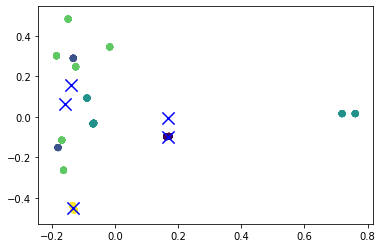

In [93]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

# 9.8

In [131]:
import nltk; nltk.download('stopwords')
nltk.download('punkt')
import nltk
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\K.N.W\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\K.N.W\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [124]:
keyword = "South Korea";     # 자신이 검색하고 싶은 유저
search = [] # 크롤링 결과 저장할 변수   

In [125]:
cnt = 1
while(cnt <= 10):   # 10page 대상으로 크롤링
   tweets = api.search(keyword)
   for tweet in tweets:
       search.append(tweet)
   cnt += 1

In [126]:
#전체 문서 보기

data = {}   # 전체 문서 추가
i = 0       # 문서 번호
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    print(i, " : ", data)   # 문서번호 : 문서내용
    i += 1

0  :  {'text': 'RT @ARMYLAND_TH: เพลง ‘ON’ #BTS เข้าชิง ที่1 วันนี้ รายการ Music Core \n\nโหวตได้ที่How to vote:\n1. คลิกลิงก์: https://t.co/PICQCOTiaK\n2. เลื…'}
1  :  {'text': 'RT @justme_relax: South Korea National Assembly: South Korean women suffering from an atrocious digital sex crime called the“Nth Room” - Si…'}
2  :  {'text': 'RT @ErikSolheim: Bravo!\nSouth Korea 🇰🇷 has set up ‘phone booths’ that can test people for the coronavirus in just 7 minutes. The country ha…'}
3  :  {'text': 'RT @starmometer: Vote for #KimTaehyung of South Korea 🇰🇷 in the finals of #100AsianHeartthrobs2020:\n\n1 Like = 10 Votes\n1 Retweet = 10 Votes…'}
4  :  {'text': 'RT @ajaymaken: We had urged the Government to drastically increase the Testing capacity.\n\nGlobal Coronavirus tests performed List👇\n\n316,664…'}
5  :  {'text': 'RT @ErikSolheim: Bravo!\nSouth Korea 🇰🇷 has set up ‘phone booths’ that can test people for the coronavirus in just 7 minutes. The country ha…'}
6  :  {'text': "RT @mygbebe: It's

In [127]:
# 전체 문서를 파일 저장

import os
    
wfile = open(os.getcwd()+"/South Korea.txt", mode='w', encoding="utf-8")   # 쓰기 모드
data = {}   # 전체 문서 추가
i = 0       # 문서 번호

In [128]:
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    wfile.write(data['text']+'\n')  # 파일 출력
    i += 1

wfile.close()

In [129]:
file = open(os.getcwd()+'/South Korea.txt', mode='r', encoding='utf-8')

In [130]:
trump = file.readlines()

In [159]:
new = []
for d in trump:
    txt = re.sub("\n", "", d)
    txt = re.sub("rt", " ", txt)
    txt = re.sub("RT", " ", txt)
    txt = re.sub("amp", "", txt)
    txt = re.sub("^ ", ' ', txt)
    txt = re.sub(" $", "", txt)
    txt = re.sub(" +w", "", txt)
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub("https?://\S+", "", txt)
    txt = re.sub("https", "", txt)
    new.append(txt)

In [160]:
new

['   ARMYLAND TH        ON   BTS                            Music Core',
 '',
 '          How to vote ',
 '                 t co PICQCOTiaK',
 '       ',
 '   justme relax  South Korea National Assembly  South Koreanomen suffering from an atrocious digital sex crime called the Nth Room    Si ',
 '   ErikSolheim  Bravo ',
 'South Korea    has set up  phone booths  that can test people for the coronavirus in just   minutes  The country ha ',
 '   starmometer  Vote for  KimTaehyung of South Korea    in the finals of     AsianHea throbs     ',
 '',
 '  Like      Votes',
 '  Retweet      Votes ',
 '   ajaymaken  We had urged the Government to drastically increase the Testing capacity ',
 '',
 'Global Coronavirus tests performed List ',
 '',
 '        ',
 '   ErikSolheim  Bravo ',
 'South Korea    has set up  phone booths  that can test people for the coronavirus in just   minutes  The country ha ',
 '   mygbebe  It s just March and BTS are already the a istith the most music showins in     

In [161]:
import pandas as pd
text = pd.DataFrame(new)
text.columns = ["trump"]

In [162]:
text

,trump
0,ARMYLAND TH ON BTS ...
1,
2,How to vote
3,t co PICQCOTiaK
4,
...,...
445,Update chara taehyungpic starmometer Vote f...
446,ErikSolheim Bravo
447,South Korea has set up phone booths that ...
448,ErikSolheim Bravo


In [163]:
text['trump'] = text.apply(lambda row: nltk.word_tokenize(row['trump']), axis=1)
text.head()

,trump
0,"[ARMYLAND, TH, ON, BTS, Music, Core]"
1,[]
2,"[How, to, vote]"
3,"[t, co, PICQCOTiaK]"
4,[]


In [164]:
# 불용어 처리
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['trump'] = text['trump'].apply(lambda x: [word for word in x if word not in (stop)])
text.head()

,trump
0,"[ARMYLAND, TH, ON, BTS, Music, Core]"
1,[]
2,"[How, vote]"
3,"[co, PICQCOTiaK]"
4,[]


In [165]:
# 표제어 추출
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
text['trump'] = text['trump'].apply(lambda x : [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
text.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\K.N.W\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,trump
0,"[ARMYLAND, TH, ON, BTS, Music, Core]"
1,[]
2,"[How, vote]"
3,"[co, PICQCOTiaK]"
4,[]


In [166]:
tokenized_doc = text['trump'].apply(lambda x : [word for word in x if len(word) > 3])
tokenized_doc[:5]

0    [ARMYLAND, Music, Core]
1                         []
2                     [vote]
3               [PICQCOTiaK]
4                         []
Name: trump, dtype: object

In [167]:
# 역토큰화
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
text['trump'] = detokenized_doc
# 다시 text['headline_text'] 에 저장
text.head()

,trump
0,ARMYLAND Music Core
1,
2,vote
3,PICQCOTiaK
4,


In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(text['trump'])
X.shape

(450, 82)

In [169]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)
lda_top = lda_model.fit_transform(X)
print(lda_model.components_)
print(lda_model.components_.shape)

[[ 0.50067741  0.48471498  0.56627902  3.56518643  0.44466977  0.57111145
   0.54843994  0.61722813  0.49325307  0.49663323  0.56669867  0.53493202
   0.54413196  0.50099169  0.64885698  0.54416664  3.16251374  0.52513978
   0.56305307  0.45389924  0.4913549   0.55057313  0.59412684  0.51587066
   0.45938131  0.46646488  0.55891807  0.51524717  0.43334563  0.53805552
   0.53611284  0.49441682  2.83755209  0.57979881  0.55829808  0.50787054
   0.54391488  1.69514073  0.51851655  0.50462311  0.54726739  0.54159307
   1.71347967  0.509515    0.50476657  3.8761971   1.72690585  0.55784228
   0.54885358  0.48503761  0.48102659  0.45691088  0.51181087  0.48225197
   0.52527414  0.57973845  0.54792111  0.54837658  0.5099125   0.50365638
   0.51183208  0.49402055  1.75014813  0.57800873  0.55342367  0.54613541
   0.56629798  0.57242074  1.67766673  0.5317088   0.53984406  0.41251063
   0.52190326  0.49735185  0.50310618  0.53774004  0.51393327  0.52274584
   0.50205339  0.57555461  0.97463312 

In [170]:
terms = vectorizer.get_feature_names() 
# 단어 집합. 1,000개의 단어가 저장되어있음.
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d :" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n -1:-1]])
get_topics(lda_model.components_, terms)

Topic 1 : [('music', 3.88), ('armyland', 3.57), ('core', 3.16), ('istith', 2.84), ('remain', 1.75)]
Topic 2 : [('vote', 12.02), ('official', 4.63), ('public', 4.58), ('update', 2.52), ('kimtaehyung', 2.5)]
Topic 3 : [('votes', 18.43), ('retweet', 11.64), ('like', 11.28), ('south', 2.39), ('digital', 2.0)]
Topic 4 : [('throb', 5.7), ('asianhea', 5.66), ('starmometer', 5.36), ('finals', 5.26), ('vote', 5.13)]
Topic 5 : [('eriksolheim', 14.63), ('bravo', 14.59), ('perform', 2.72), ('global', 2.67), ('list', 2.63)]
Topic 6 : [('people', 7.28), ('phone', 7.19), ('country', 7.14), ('booths', 7.14), ('minutes', 7.09)]
Topic 7 : [('picqcotiak', 5.65), ('like', 1.17), ('votes', 0.95), ('armyland', 0.8), ('claudiopoy', 0.78)]
Topic 8 : [('government', 2.34), ('ajaymaken', 2.33), ('increase', 2.3), ('drastically', 2.29), ('capacity', 2.29)]
Topic 9 : [('play', 2.35), ('asia', 2.26), ('chellaney', 2.2), ('doomsday', 2.18), ('pivotal', 2.17)]
Topic 10 : [('daily', 2.25), ('today', 2.23), ('place', 